In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

ModuleNotFoundError: No module named 'missingno'

In [2]:
def load_application_train():
    data = pd.read_csv("application_train.csv")
    return data

In [3]:

df = load_application_train()
print(df.shape)        # (307511, 122)


(307511, 122)


In [4]:
def load():
    data = pd.read_csv("titanic.csv")
    return data

In [5]:
df = load()
print(df.shape)

(891, 12)


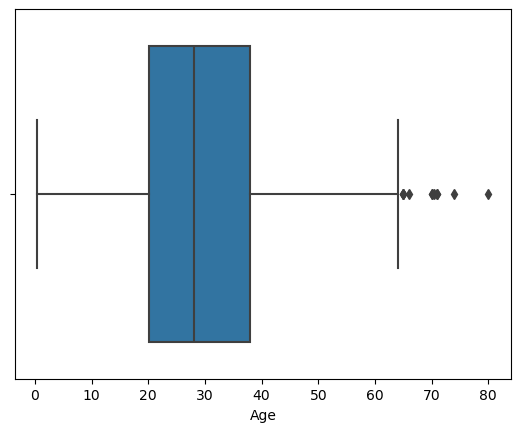

In [6]:
#Let's begin with the smaller dataset, "titanic.csv"
#We will try to detect outliers in a numerical 'Age' column by using 
#boxplot.

sns.boxplot(x=df["Age"])
plt.show()

In [7]:
#We know how a boxplot is constructed. So we need to find Q1(25th percentile)
#Q3(75th percentile), and then minimum and maximum values by using 1.5IQR.

q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr




#Now see outliers
print(df[(df["Age"] < low) | (df["Age"] > up)])

     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   male  66.0    

In [8]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit




print(outlier_thresholds(df, "Age")) # (-6.6875, 64.8125)

(-6.6875, 64.8125)


In [9]:
low, up = outlier_thresholds(df, "Fare")

print(df[(df["Fare"] < low) | (df["Fare"] > up)].head())

    PassengerId  Survived  Pclass  \
1             2         1       1   
27           28         0       1   
31           32         1       1   
34           35         0       1   
52           53         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                     Fortune, Mr. Charles Alexander    male  19.0      3   
31     Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                            Meyer, Mr. Edgar Joseph    male  28.0      1   
52           Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   

    Parch    Ticket      Fare        Cabin Embarked  
1       0  PC 17599   71.2833          C85        C  
27      2     19950  263.0000  C23 C25 C27        S  
31      0  PC 17569  146.5208          B78        C  
34      0  PC 17604   82.1708          NaN        C  
52      0  PC 17572   76.7292         

In [10]:
print(outlier_thresholds(df, "Fare"))

(-26.724, 65.6344)


In [11]:
#Write a function that check if there is any outliers.
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

print(check_outlier(df, "Age"))    # True  (yes, there is at least 1 outlier.)
print(check_outlier(df, "Fare")) 

True
True


In [12]:
low, up = outlier_thresholds(df, "Fare")
#Shape of data with outliers
print(df.shape) # (891, 12)

(891, 12)


In [13]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [14]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [15]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

NameError: name 'grab_col_names' is not defined

In [ ]:
df = load()

low, up = outlier_thresholds(df, "Fare")
print(df.shape)

print(df[~((df["Fare"] < low) | (df["Fare"] > up))].shape)

def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols.remove('PassengerId')

for col in num_cols:
    df = remove_outlier(df, col)

print(df.shape)

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

df = load()

cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols.remove('PassengerId')

for col in num_cols:
    replace_with_thresholds(df, col)

for col in num_cols:
    print(col, check_outlier(df, col))



In [ ]:
df = sns.load_dataset('diamonds')
print(df.shape)  #  (53940, 10)
print(df.head())

In [ ]:
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
print(df.shape)   #  (53940, 7)
print(df.head())

In [ ]:
for col in df.columns:
    print(col, check_outlier(df, col))
    

In [ ]:
#Let's see how many rows contain outlier 'carat'
low, up = outlier_thresholds(df, "carat")
print(df[((df["carat"] < low) | (df["carat"] > up))].shape)  # (1889, 7)
#As you can see there are so many 'carat' outlier.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

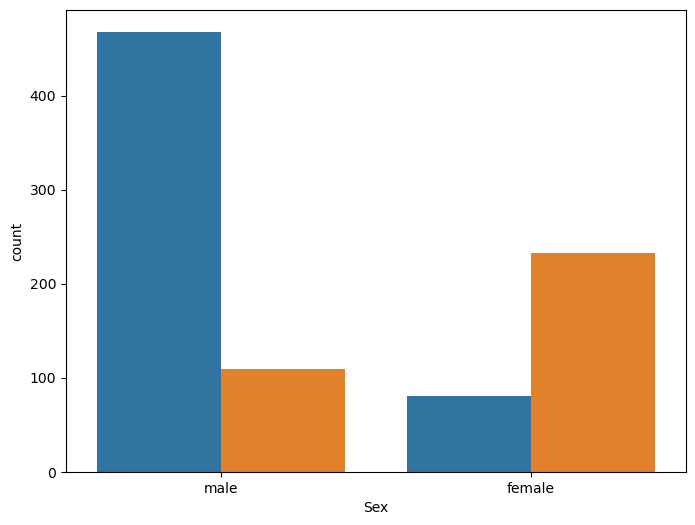

In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Load the Titanic dataset (assuming 'titanic.csv' is available in the current directory)
df = pd.read_csv('titanic.csv')

# Visualize survival count by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Explore age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)  # Using dropna() to avoid issues with missing values
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [20]:
df = sns.load_dataset('diamonds')
print(df.shape)  #  (53940, 10)
print(df.head())

(53940, 10)
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [21]:
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
print(df.shape)   #  (53940, 7)
print(df.head())

(53940, 7)
   carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75


In [22]:
for col in df.columns:
    print(col, check_outlier(df, col))

carat True
depth True
table True
price True
x True
y True
z True


In [23]:
low, up = outlier_thresholds(df, "carat")
print(df[((df["carat"] < low) | (df["carat"] > up))].shape)  # (1889, 7

(1889, 7)


In [24]:
low, up = outlier_thresholds(df, "depth")
print(df[((df["depth"] < low) | (df["depth"] > up))].shape)  # (2545, 7)

(2545, 7)


In [26]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Assuming df is already defined and loaded
# Example: df = pd.read_csv('your_dataset.csv')

# Create and fit the LocalOutlierFactor model
clf = LocalOutlierFactor(n_neighbors=20)
df['outlier'] = clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_

print(df_scores)


[-1.58352526 -1.59732899 -1.62278873 ... -1.06721815 -1.00809552
 -1.00849038]


In [27]:
print(np.sort(df_scores)[0:5])

[-8.60430658 -8.20889984 -5.86084355 -4.98415175 -4.81502092]


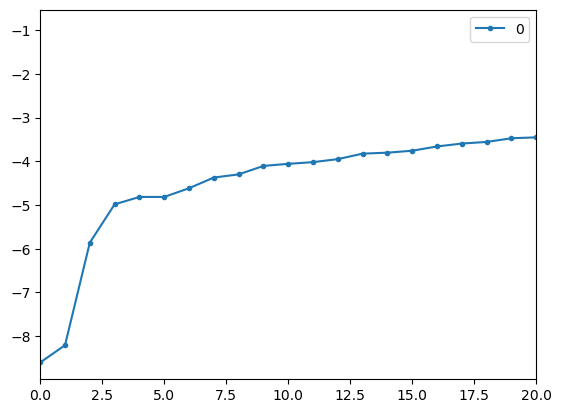

In [28]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()  #IMAGE IS BELOW! LOF.png